# Image Informatics Lab 2
## 1.1 Histograms and Histogram Processing
Tasks:
1. Plot the histograms of each of the R, G and B colour channels from an image. Plot each in
it corresponding colour and overlay them as a single image
2. Perform histogram equalization on each of the R, G and B colour channels from an image.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, data, img_as_ubyte
import cv2
from skimage.exposure import equalize_hist


In [26]:
def rgb_isolate_channel(im, channel):
    """ 
    Isolate a single color channel in an RGB image.
    
    Parameters:
        im (ndarray): Input RGB image.
        channel (str): Color channel to isolate ('R', 'G', or 'B').
    Returns:
        ndarray: Image with only the specified channel.
    """
    imc = im.copy()
    for c in range(im.shape[2]):
        if c != channel:
            imc[:, :, c] = np.zeros_like(im[:, :, c])
    return imc

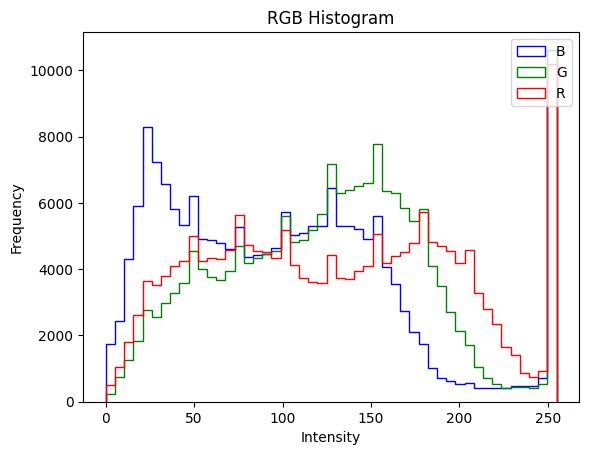

In [49]:
img = cv2.imread("p1-images/horse.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

r = np.concatenate(img[:,:,0])
g = np.concatenate(img[:,:,1])
b = np.concatenate(img[:,:,2])
bins = np.linspace(0, 255, 50)
plt.hist([r, g, b], bins, label=['R', 'G', 'B'], color=['r', 'g', 'b'], histtype='step')
plt.legend(loc='upper right')
plt.title("RGB Histogram")
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

ValueError: The 'color' keyword argument must have one color per dataset, but 3 datasets and 1 colors were provided

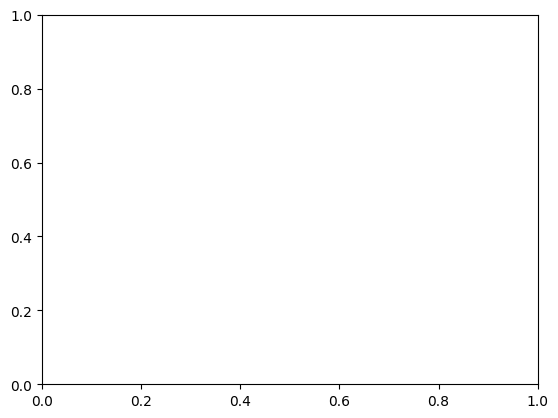

In [54]:
img = cv2.imread("p1-images/horse.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

imeq = equalize_hist(img)
imeq = img_as_ubyte(imeq)
v = np.concatenate(imeq)
bins = np.linspace(0, 255, 50)
plt.hist(v, bins, color='k', histtype='step')
plt.title("Histogram")
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()